# Исследование факторов, связанных с отклонениями индекса массы тела и употреблением алгоголя

In [73]:
import sys
# Добавим папку проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [74]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from utils.constants import (
    F, 
    FieldSemanticCategory,
)
from utils.graphics import (
    display_corellation_by_target,
    display_clusters_profiles,
)
from utils.display_content import (
    dislay_some_fields_description,
    display_field_description,
)
from utils.prepare_data import (
    get_fields_by_semantic_category,
    get_temp_rename_dict,
    add_child_mortality_data,
    get_scaled_data,
)

from warnings import simplefilter
simplefilter('ignore')

In [75]:
# Загрузим таблицу
data_source = pd.read_csv('../data/cumulative_life_expectancy_prepared.csv')

data_source.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,AdultMortality,Homicides,MaternalMortality,AdultNcdMortality,AdultNcdMortality117,...,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,GdpPerCapita,Population,Schooling,ClusterKMeans,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,34.56,0.01331,0.859921,30.5,0.028126,...,27.56,41.14,2.74,1.11,7.66,563.733796,16194869.0,5.027188,1,49.37
1,AFR,Africa,AGO,Angola,2001,33.86,0.01310,0.799641,29.7,0.027503,...,28.99,42.25,5.97,2.05,13.35,533.586202,16747208.0,5.092250,1,50.06
2,AFR,Africa,AGO,Angola,2002,32.51,0.01288,0.758272,29.4,0.027049,...,30.42,43.38,4.19,1.31,11.54,882.147847,17327699.0,5.157312,1,51.06
3,AFR,Africa,AGO,Angola,2003,32.16,0.01265,0.676496,29.3,0.026962,...,31.86,44.36,4.26,1.47,14.55,992.698979,17943712.0,5.222375,1,51.74
4,AFR,Africa,AGO,Angola,2004,32.24,0.01229,0.594192,29.0,0.026300,...,33.29,45.35,5.66,1.69,21.36,1266.210864,18600423.0,5.287437,1,52.36


Оставим в таблице только те поля, которые будем рассматривать.

In [76]:
# Поля с данными индекса массы тела и употребления алкоголя
health_fields = get_fields_by_semantic_category(
    FieldSemanticCategory.HEALTH.value
)

# Оставим в таблице только рассматриваемые поля
field_names = health_fields + [F.ClusterKMeans.value, F.LifeExpectancy.value]

data = data_source[field_names]

data.head()

,AlcoholСonsumption,BmiAdultUnderweight,BmiAdultOverweight25,BmiAdultOverweight30,BmiChildThinness,BmiTeenagerThinness,BmiChildOverweight1,BmiTeenagerOverweight1,BmiChildOverweight2,BmiTeenagerOverweight2,ClusterKMeans,LifeExpectancy
0,4.24,14.17,19.92,5.30,7.92,10.57,5.43,5.26,1.49,0.99,1,49.37
1,4.24,13.97,20.59,5.59,7.76,10.37,5.72,5.51,1.60,1.07,1,50.06
2,4.47,13.75,21.26,5.88,7.60,10.17,6.02,5.77,1.71,1.14,1,51.06
3,4.62,13.53,21.93,6.17,7.44,9.97,6.33,6.04,1.83,1.22,1,51.74
4,5.12,13.31,22.58,6.46,7.28,9.76,6.65,6.31,1.96,1.31,1,52.36


In [77]:
dislay_some_fields_description(field_names)

**Описание полей:**

- `AlcoholСonsumption` - Потребление алкоголя на душу населения (15+) (в литрах чистого алкоголя)

- `BmiAdultUnderweight` - Распространенность недостаточного веса среди взрослых, ИМТ < 18,5 (стандартизированная по возрасту оценка) (%)

- `BmiAdultOverweight25` - Распространенность избыточного веса среди взрослых, ИМТ >= 25 (стандартизированная по возрасту оценка) (%)

- `BmiAdultOverweight30` - Распространенность ожирения среди взрослых, ИМТ >= 30 (стандартизированная по возрасту оценка) (%)

- `BmiChildThinness` - Распространенность худобы среди детей 5-9 лет, ИМТ < -2 стандартных отклонений ниже медианы (грубая оценка) (%)

- `BmiTeenagerThinness` - Распространенность худобы среди подростков 10-19 лет, ИМТ < -2 стандартных отклонений ниже медианы (грубая оценка) (%)

- `BmiChildOverweight1` - Распространенность избыточного веса среди детей 5-9 лет, ИМТ > +1 стандартного отклонения выше медианы (грубая оценка) (%)

- `BmiTeenagerOverweight1` - Распространенность избыточного веса среди подростков 10-19 лет, ИМТ > +1 стандартного отклонения выше медианы (грубая оценка) (%)

- `BmiChildOverweight2` - Распространенность ожирения среди детей 5-9 лет, ИМТ > +2 стандартных отклонений выше медианы (грубая оценка) (%)

- `BmiTeenagerOverweight2` - Распространенность ожирения среди подростков 10-19 лет, ИМТ > +2 стандартных отклонений выше медианы (грубая оценка) (%)

- `ClusterKMeans` - Кластер страны, определенный с помощью k-means

- `LifeExpectancy` - Ожидаемая продоложительность жизни

## Сравнение средних показателей индекса массы тела и употребления алкоголя в кластерах стран

In [78]:
# Для большей наглядности возьмем среднее по признакам повышенного и пониженного BMI

# Среднее по факторам повышенного BMI
data['BmiOverweightMean'] = data[[
    F.BmiChildOverweight1.value,
    F.BmiChildOverweight2.value,
    F.BmiTeenagerOverweight1.value,
    F.BmiTeenagerOverweight2.value,
    F.BmiAdultOverweight25.value,
    F.BmiAdultOverweight30.value,
]].mean(axis=1)

# Среднее по факторам пониженного BMI
data['BmiUnderweightMean'] = data[[
    F.BmiAdultUnderweight.value,
    F.BmiChildThinness.value,
    F.BmiTeenagerThinness.value,
]].mean(axis=1)

health_data = data[[
    'BmiOverweightMean', 
    'BmiUnderweightMean', 
    F.AlcoholСonsumption.value,
    F.ClusterKMeans.value, 
    F.LifeExpectancy.value,
]]

In [79]:
# Для построения графика масштабируем данные
health_scaled_data = get_scaled_data(health_data)

# Построим полярную диаграмму
display_clusters_profiles(    
    health_scaled_data.groupby(F.ClusterKMeans.value).agg('mean'),
    title='Сравнение средних показателей отклонения индекса массы тела и употребления алкоголя в кластерах стран',
    should_display_table=False,
    is_custom_size=False,
)

В странах с большей продолжительностью жизни (кластер 0) 
- больше людей имеют избыточный вес 
- и больше употребляют алкоголя.

В странах с меньшей продолжительностью жизни (кластер 1) 
- больше людей имеют недостаточный вес. 

### Сравнение типов отклонений индекса массы тела в кластерах стран

In [80]:
# Поля с факторами отклонений BMI
bmi_fields = [
    # Факторы повышенного BMI
    F.BmiChildOverweight1.value,
    F.BmiChildOverweight2.value,
    F.BmiTeenagerOverweight1.value,
    F.BmiTeenagerOverweight2.value,
    F.BmiAdultOverweight25.value,
    F.BmiAdultOverweight30.value,
    # Факторы пониженного BMI
    F.BmiChildThinness.value,
    F.BmiTeenagerThinness.value,
    F.BmiAdultUnderweight.value,
]

# Возьмем среднее по показателям BMI по кластерам стран
bmi_data = data[bmi_fields + [F.ClusterKMeans.value]] \
    .groupby(F.ClusterKMeans.value) \
    .agg('mean') \
    .reset_index() \
    .rename(columns={'index': F.ClusterKMeans.value}) \

bmi_data

,ClusterKMeans,BmiChildOverweight1,BmiChildOverweight2,BmiTeenagerOverweight1,BmiTeenagerOverweight2,BmiAdultOverweight25,BmiAdultOverweight30,BmiChildThinness,BmiTeenagerThinness,BmiAdultUnderweight
0,0,26.393834,10.963989,24.943297,8.523073,54.719076,22.133716,3.309829,3.586927,3.502882
1,1,9.961369,3.469167,9.368914,2.213527,25.487917,8.154278,7.961741,10.329137,13.381562


In [81]:
# Для построения графика переведем столбцы в строки
bmi_data = bmi_data.melt(
    id_vars=[F.ClusterKMeans.value], 
    var_name='BmiType', 
    value_name='Mean'
)

bmi_data.head()

,ClusterKMeans,BmiType,Mean
0,0,BmiChildOverweight1,26.393834
1,1,BmiChildOverweight1,9.961369
2,0,BmiChildOverweight2,10.963989
3,1,BmiChildOverweight2,3.469167
4,0,BmiTeenagerOverweight1,24.943297


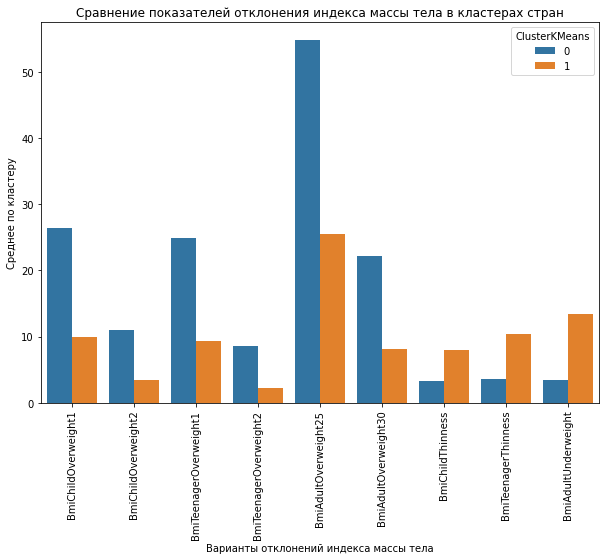

In [82]:
# Построим график
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=bmi_data,
    x='BmiType',
    y='Mean',
    hue=F.ClusterKMeans.value,
)
barplot.set_xlabel('Варианты отклонений индекса массы тела')
barplot.set_ylabel('Среднее по кластеру')
barplot.tick_params(axis='x', rotation=90)
barplot.set_title('Сравнение показателей отклонения индекса массы тела в кластерах стран');

In [83]:
dislay_some_fields_description(
    bmi_fields, 
    title='Варианты отклонений индекса массы тела'
)

**Варианты отклонений индекса массы тела:**

- `BmiChildOverweight1` - Распространенность избыточного веса среди детей 5-9 лет, ИМТ > +1 стандартного отклонения выше медианы (грубая оценка) (%)

- `BmiChildOverweight2` - Распространенность ожирения среди детей 5-9 лет, ИМТ > +2 стандартных отклонений выше медианы (грубая оценка) (%)

- `BmiTeenagerOverweight1` - Распространенность избыточного веса среди подростков 10-19 лет, ИМТ > +1 стандартного отклонения выше медианы (грубая оценка) (%)

- `BmiTeenagerOverweight2` - Распространенность ожирения среди подростков 10-19 лет, ИМТ > +2 стандартных отклонений выше медианы (грубая оценка) (%)

- `BmiAdultOverweight25` - Распространенность избыточного веса среди взрослых, ИМТ >= 25 (стандартизированная по возрасту оценка) (%)

- `BmiAdultOverweight30` - Распространенность ожирения среди взрослых, ИМТ >= 30 (стандартизированная по возрасту оценка) (%)

- `BmiChildThinness` - Распространенность худобы среди детей 5-9 лет, ИМТ < -2 стандартных отклонений ниже медианы (грубая оценка) (%)

- `BmiTeenagerThinness` - Распространенность худобы среди подростков 10-19 лет, ИМТ < -2 стандартных отклонений ниже медианы (грубая оценка) (%)

- `BmiAdultUnderweight` - Распространенность недостаточного веса среди взрослых, ИМТ < 18,5 (стандартизированная по возрасту оценка) (%)

По графику видно, что

- Во всех случаях с избыточным весом \
отклонений, находящихся в первой стадии (менее выраженной) \
больше, чем во второй стадии (более выраженной).

- Для стран из кластера 0 (с большей продолжительностью жизни) больше отклонений в сторону избыточного веса.\
Для стран из кластера 1 (с меньшей продолжительностью жизни) больше отклонений в сторону недостаточного веса.

## Исследование корреляции отклонений индекса массы тела со смертностью от диабета

Есть предположение, что признак избыточного веса должен коррелировать со смертностью от сахарного диабета.\
Проверим это отдельно для каждого кластера.

In [84]:
display_field_description(F.AdultNcdMortality080.value)

`AdultNcdMortality080` - Смертность взрослых от неинфекционных заболеваний (%). Сахарный диабет

In [85]:
# Данные кластера 0
cluster_0_data = data_source[data_source[F.ClusterKMeans.value] == 0]
# Данные кластера 1
cluster_1_data = data_source[data_source[F.ClusterKMeans.value] == 1]

# Поля, которые будем рассматривать
bmi_diabetes_fields = bmi_fields + [F.AdultNcdMortality080.value]

### Корреляция для стран кластера 0 (с большей продолжительностью жизни)

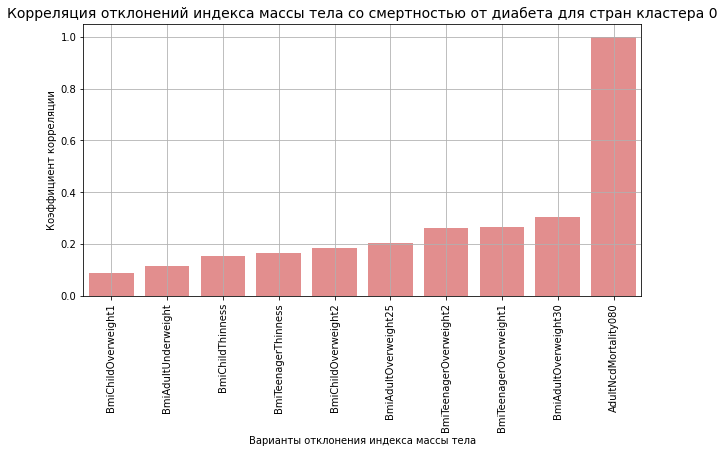

In [86]:
# Построим график для кластера 0
display_corellation_by_target(
    cluster_0_data[bmi_diabetes_fields],
    figsize=(10, 5),
    target_feature_name=F.AdultNcdMortality080.value,
    title='Корреляция отклонений индекса массы тела со смертностью от диабета для стран кластера 0',
    xlabel='Варианты отклонения индекса массы тела',
    ylabel='Коэффициент корреляции',
)

В странах из кластера 0 корреляция признаков избыточного веса со смертностью от диабета небольшая, около 0.3 и ее можно считать незначительной.

### Корреляция для стран кластера 1 (с меньшей продолжительностью жизни)

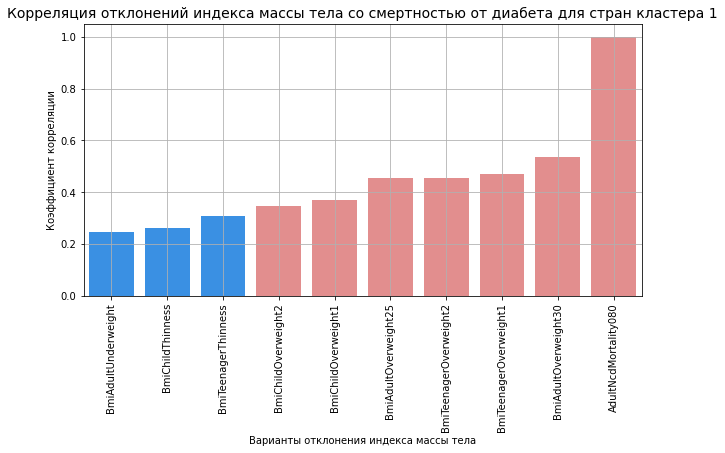

In [87]:
display_corellation_by_target(
    cluster_1_data[bmi_diabetes_fields],
    figsize=(10, 5),
    target_feature_name=F.AdultNcdMortality080.value,
    title='Корреляция отклонений индекса массы тела со смертностью от диабета для стран кластера 1',
    xlabel='Варианты отклонения индекса массы тела',
    ylabel='Коэффициент корреляции',
)

В странах из кластера 1 корреляция признаков избыточного веса со смертностью от диабета средняя и составляет около 0.5.

## Исследование корреляции количества употребляемого алгоколя с причинами смертности

Также посмотрим эту корреляцию отдельно для двух кластеров стран.

In [88]:
# Добавим в основную таблицу данные о детской смертности
cumulative_data = add_child_mortality_data(data_source)

# Данные стран кластера 0
cluster_0_data = cumulative_data[cumulative_data[F.ClusterKMeans.value] == 0]
# Данные стран кластера 1
cluster_1_data = cumulative_data[cumulative_data[F.ClusterKMeans.value] == 1]

# Поля с факторами взрослой смертности
adult_mortality_fields = get_fields_by_semantic_category(FieldSemanticCategory.ADULT_MORTALITY.value)
# Поля с факторами детской смертности
child_mortality_fields = get_fields_by_semantic_category(FieldSemanticCategory.CHILD_MORTALITY.value)

# Список полей, которые будем рассматривать
alcohol_mortality_fields = \
    child_mortality_fields + adult_mortality_fields + [F.AlcoholСonsumption.value]

# Оставим только нужные поля
cluster_0_data = cluster_0_data[alcohol_mortality_fields]
cluster_1_data = cluster_1_data[alcohol_mortality_fields]

# Словарь для переименования признаков
rename_dict = get_temp_rename_dict(cluster_0_data)

### Корреляция для стран кластера 0 (с большей продолжительностью жизни)

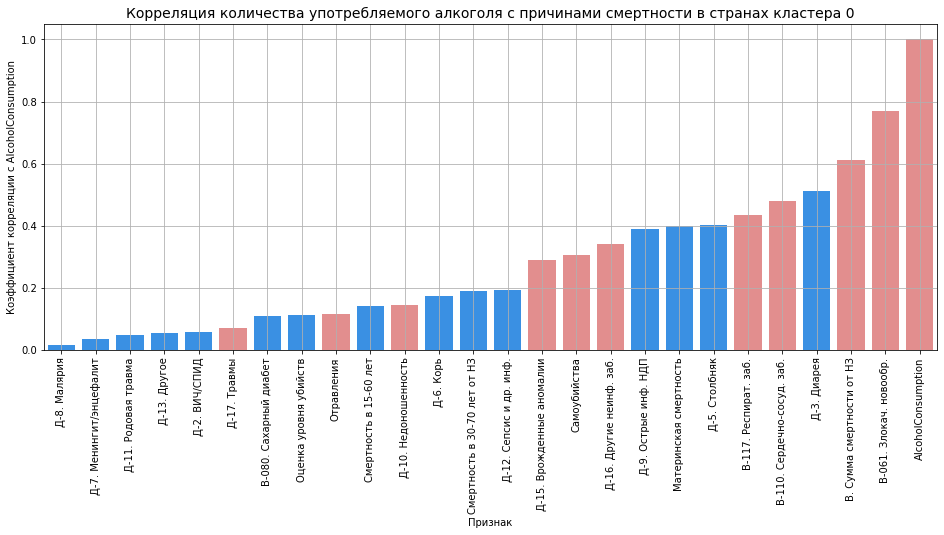

In [89]:
display_corellation_by_target(
    cluster_0_data.rename(columns=rename_dict),
    figsize=(16, 6),
    target_feature_name=F.AlcoholСonsumption.value,
    title='Корреляция количества употребляемого алкоголя с причинами смертности в странах кластера 0',
)

Для стран кластера 0 у признака количества употребляемого алкоголя
- Наибольшая корреляция со смертностью от злокачественных новообразований и смертностью от неинфекционных заболеваний.

### Корреляция для стран кластера 1 (с меньшей продолжительностью жизни)

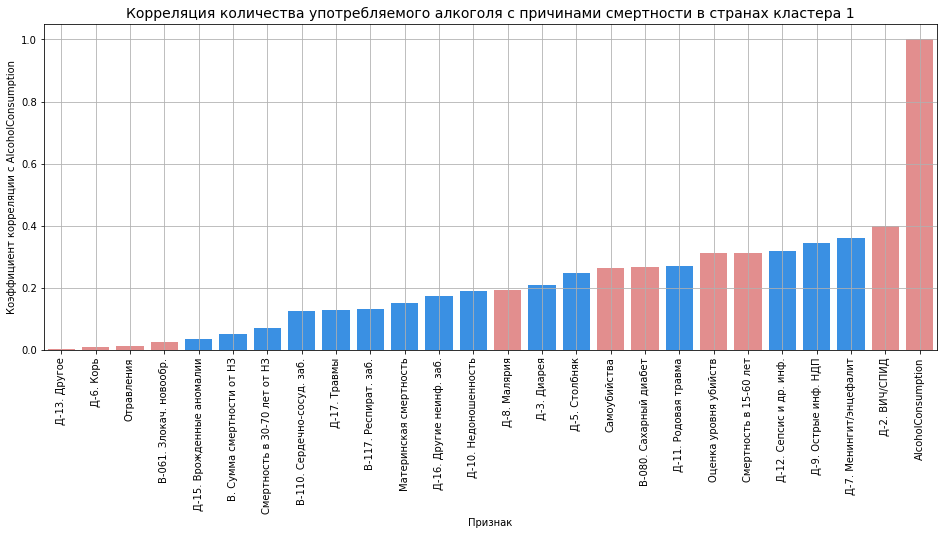

In [90]:
display_corellation_by_target(
    cluster_1_data.rename(columns=rename_dict),
    figsize=(16, 6),
    target_feature_name=F.AlcoholСonsumption.value,
    title='Корреляция количества употребляемого алкоголя с причинами смертности в странах кластера 1',
)

Для стран кластера 1 у признака количества употребляемого алкоголя
- Наибольшая корреляция со смертностью от ВИЧ/СПИД.

## Выводы

- В странах с большей продолжительностью жизни (кластер 0) \
больше людей имеют избыточный вес и больше употребляют алкоголя.

- В странах с меньшей продолжительностью жизни (кластер 1) больше людей имеют недостаточный вес. 

- Во всех случаях с избыточным весом отклонений, находящихся в первой стадии (менее выраженной) \
больше, чем во второй стадии (более выраженной).

- Факторы отлонения индекса массы тела в сторону избыточного веса \
имеют слабую корреляцию со смертностью от диабета для стран кластера 0 \
и среднюю (около 0.5) для стран кластера 1.

- Фактор количества употребляемого алкоголя \
имеет наибольшую корреляцию со смертностью от злокачественных новообразований (0.78) и неинфеционных заболеваний (0.6) для стран кластера 0\
и со смертностью от ВИЧ/СПИД для стран кластера 1 (0.4).